In [35]:
import pandas as pd
import matplotlib as pyplot
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [36]:
dataset = pd.read_csv('datasets/Iris.csv')

In [37]:
#Dimensions of the Data
print(dataset.shape)

(150, 6)


In [44]:
#Peek at the Data
dataset.head(20)
dataset = dataset.drop('Id', axis=1)

In [45]:
dataset.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

In [46]:
#Class Distribution
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

SepalLengthCm       AxesSubplot(0.125,0.536818;0.352273x0.343182)
SepalWidthCm     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
PetalLengthCm          AxesSubplot(0.125,0.125;0.352273x0.343182)
PetalWidthCm        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

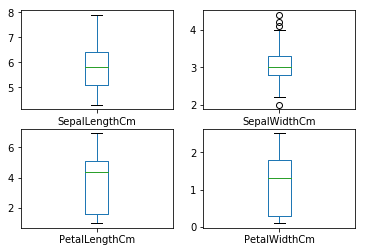

In [47]:
#Data Visualization
#Univariate Plots
dataset.plot(kind = 'box', subplots=True, layout=(2,2), sharex= False, sharey= False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A21B746320>,
      dtype=object)

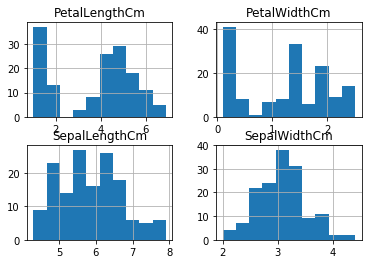

In [48]:
dataset.hist()

In [49]:
#Multivariate Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A21B8AF780>,
      dtype=object)

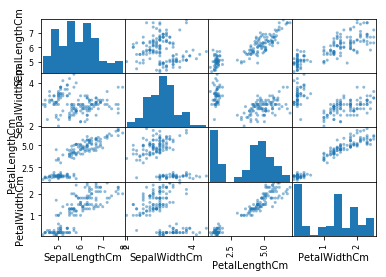

In [50]:
scatter_matrix(dataset)

In [51]:
#Evaluate Some Algorithms
array = dataset.values
X = array[:, 0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y, test_size = validation_size, random_state = seed)

In [54]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names= []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring= 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWar

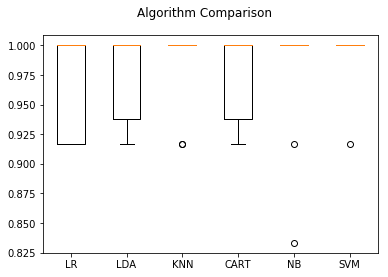

In [63]:
#Compare Algorithms
from matplotlib import *

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [64]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

